In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL

In [2]:
img = cv2.imread('mosaico.tif')

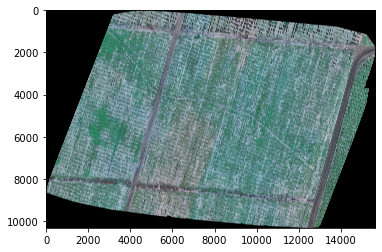

In [3]:
plt.imshow(img)

In [4]:
grasHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
light_green = (70,35,35)
dark_green = (91, 255,255)
mask = cv2.inRange(grasHSV, light_green, dark_green)
result = cv2.bitwise_and(img, img, mask=mask)

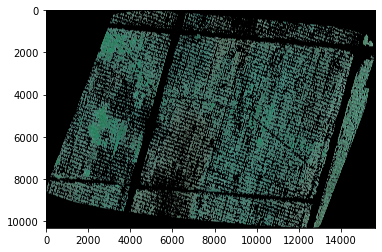

In [7]:
plt.imshow(result)

In [5]:
cv2.imwrite('mosaico.png', img)

True

In [8]:
#cv2.imwrite('mosaico.png', img)

True

In [84]:
import image_slicer
import PIL

In [87]:
PIL.warnings.simplefilter('ignore', PIL.Image.DecompressionBombWarning)

In [88]:
image_slicer.slice('mosaico.png', 16)

(<Tile #1 - mosaico_01_01.png>,
 <Tile #2 - mosaico_01_02.png>,
 <Tile #3 - mosaico_01_03.png>,
 <Tile #4 - mosaico_01_04.png>,
 <Tile #5 - mosaico_02_01.png>,
 <Tile #6 - mosaico_02_02.png>,
 <Tile #7 - mosaico_02_03.png>,
 <Tile #8 - mosaico_02_04.png>,
 <Tile #9 - mosaico_03_01.png>,
 <Tile #10 - mosaico_03_02.png>,
 <Tile #11 - mosaico_03_03.png>,
 <Tile #12 - mosaico_03_04.png>,
 <Tile #13 - mosaico_04_01.png>,
 <Tile #14 - mosaico_04_02.png>,
 <Tile #15 - mosaico_04_03.png>,
 <Tile #16 - mosaico_04_04.png>)

In [30]:
img_3_3 = cv2.imread('mosaico_03_03.png')

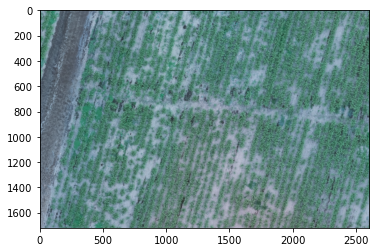

In [31]:
plt.imshow(img_3_3)

In [444]:
img_3_3.shape[0]

1720

In [1]:
max_iterations_x = img_3_3.shape[0]//45
max_iterations_y = img_3_3.shape[1]//45

pixel_iterations_x = list()
pixel_iterations_y = list()
image_crops = list()
image_crops_coord = list()
red = [0,0,255]


for i in range(max_iterations_x):
    pixel_iterations_x.append([i*45, (i+1)*45])
    
for i in range(max_iterations_y):
    pixel_iterations_y.append([i*45, (i+1)*45])



for i in range(len(pixel_iterations_y)):
    for j in range(len(pixel_iterations_x)):
        image_crops_coord.append([[pixel_iterations_x[j][0],pixel_iterations_x[j][1]],[pixel_iterations_y[i][0],pixel_iterations_y[i][1]]])
        image_crops.append(img_3_3[pixel_iterations_x[j][0]:pixel_iterations_x[j][1],pixel_iterations_y[i][0]:pixel_iterations_y[i][1],:])
            
for i in range(0,len(image_crops)):
    img_test_grey = cv2.cvtColor(image_crops[i], cv2.COLOR_BGR2GRAY)
    centroid = np.round(ndimage.measurements.center_of_mass(img_test_grey))    
    try:
        if not np.all(image_crops[i][int(centroid[0]),int(centroid[1])] == 0):
            image_crops[i][int(centroid[0]),int(centroid[1])] = red
        else:
            continue
    except:
        continue

image_container = np.zeros_like(img_3_3)

for i in range(len(image_crops)):
    image_container[image_crops_coord[i][0][0]:image_crops_coord[i][0][1], image_crops_coord[i][1][0]:image_crops_coord[i][1][1], :] = image_crops[i]

    

NameError: name 'img_3_3' is not defined

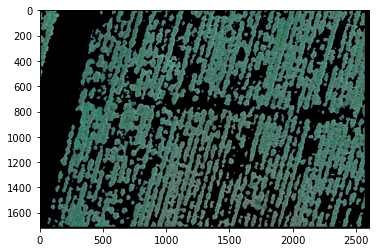

In [451]:
plt.imshow(image_container)

In [452]:
cv2.imwrite('test.png',image_container)

True

In [252]:
from scipy import ndimage

In [253]:
centroid = np.round(ndimage.measurements.center_of_mass(img_test_grey))

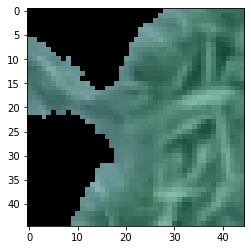

In [254]:
plt.imshow(img_test)

In [17]:
# Create a named colour
red = [255,0,0]

# Change one pixel
img_test[int(centroid[0]),int(centroid[1])] = red

NameError: name 'img_test' is not defined

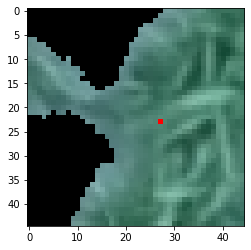

In [19]:
bugan_1 = cv2.imread('imagenes/bugan_1.tif')

In [18]:
bugan_1

In [21]:
!pip install scikit-image

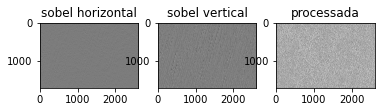

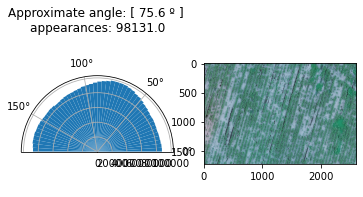

In [6]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_04_04.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


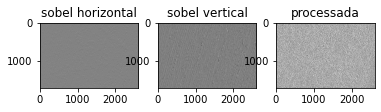

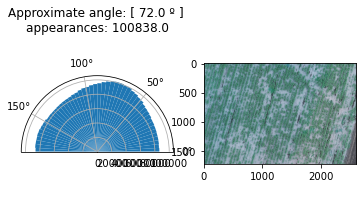

In [7]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_05_05.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


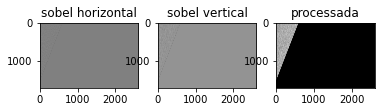

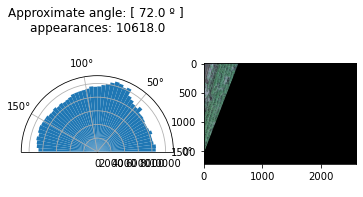

In [8]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_06_06.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


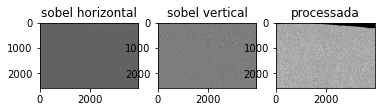

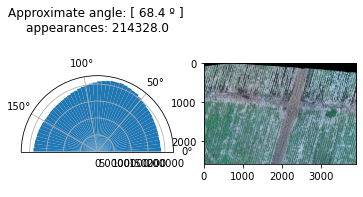

In [14]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_01_02.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


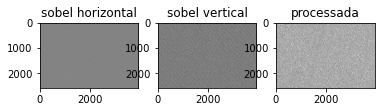

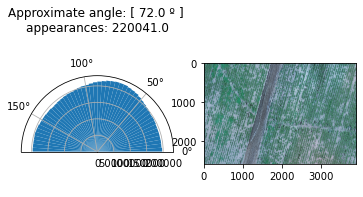

In [2]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_02_02.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


In [2]:
img = cv2.imread("mosaico_02_02.png") #load image

In [12]:
img_transformed = cv2.convertScaleAbs(img, alpha = 1.5 , beta = -25)

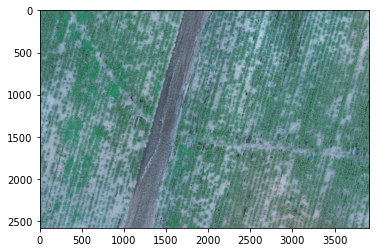

In [3]:
plt.imshow(img)

In [4]:
g_2 = np.array(img[:,:,1], dtype = np.int32) *2
ExG = g_2 - np.array(img[:,:,0], dtype = np.int32) - np.array(img[:,:,2], dtype = np.int32)

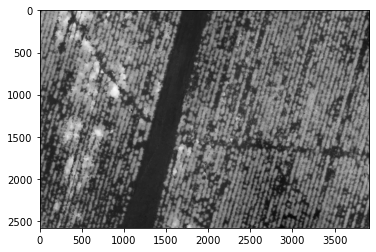

In [5]:
plt.imshow(ExG, cmap = "gray")

KeyboardInterrupt: 

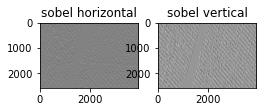

In [6]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

#img = cv2.imread("mosaico_02_02.png") #load image
#gray = rgb2gray(img_result)
#filtros sobel

gray = ExG/255
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


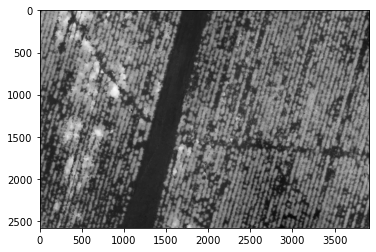

In [7]:
plt.imshow(gray, cmap = 'gray')

In [10]:

otsu_threshold, image_result = cv2.threshold( np.array(ExG, dtype = np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Obtained threshold: ", otsu_threshold)


Obtained threshold:  143.0


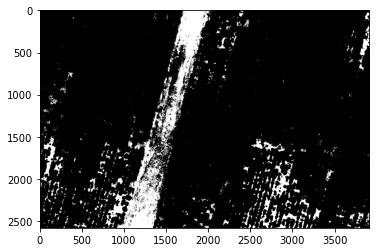

In [11]:
plt.imshow(image_result, cmap = 'gray')

In [124]:
image_result[image_result==255] = 1

In [125]:
from skimage.morphology import skeletonize

In [126]:
skeleton = skeletonize(image_result, method = 'zhang')

ValueError: Image contains values other than 0 and 1

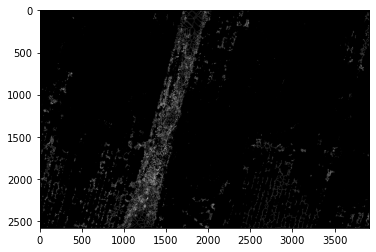

In [127]:
img_skeletonized = plt.imshow(skeleton, cmap=plt.cm.gray)

In [128]:
skeleton = np.array(skeleton, dtype = np.uint8)
skeleton[skeleton == 1] = 255

In [129]:
skeleton

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [130]:
cv2.imwrite('skeletonized.png', skeleton)

True

In [12]:
img_test2 = cv2.imread('imagenes/Tmpisque.tif')

In [13]:
cv2.imwrite('Tmpisque.png',img_test2)

True

In [57]:
import image_slicer

In [114]:
image_slicer.slice('Tmpisque.png', 64)

(<Tile #1 - Tmpisque_01_01.png>,
 <Tile #2 - Tmpisque_01_02.png>,
 <Tile #3 - Tmpisque_01_03.png>,
 <Tile #4 - Tmpisque_01_04.png>,
 <Tile #5 - Tmpisque_01_05.png>,
 <Tile #6 - Tmpisque_01_06.png>,
 <Tile #7 - Tmpisque_01_07.png>,
 <Tile #8 - Tmpisque_01_08.png>,
 <Tile #9 - Tmpisque_02_01.png>,
 <Tile #10 - Tmpisque_02_02.png>,
 <Tile #11 - Tmpisque_02_03.png>,
 <Tile #12 - Tmpisque_02_04.png>,
 <Tile #13 - Tmpisque_02_05.png>,
 <Tile #14 - Tmpisque_02_06.png>,
 <Tile #15 - Tmpisque_02_07.png>,
 <Tile #16 - Tmpisque_02_08.png>,
 <Tile #17 - Tmpisque_03_01.png>,
 <Tile #18 - Tmpisque_03_02.png>,
 <Tile #19 - Tmpisque_03_03.png>,
 <Tile #20 - Tmpisque_03_04.png>,
 <Tile #21 - Tmpisque_03_05.png>,
 <Tile #22 - Tmpisque_03_06.png>,
 <Tile #23 - Tmpisque_03_07.png>,
 <Tile #24 - Tmpisque_03_08.png>,
 <Tile #25 - Tmpisque_04_01.png>,
 <Tile #26 - Tmpisque_04_02.png>,
 <Tile #27 - Tmpisque_04_03.png>,
 <Tile #28 - Tmpisque_04_04.png>,
 <Tile #29 - Tmpisque_04_05.png>,
 <Tile #30 - Tmpisque_0

In [115]:
img = cv2.imread("Tmpisque_06_06.png") #load image

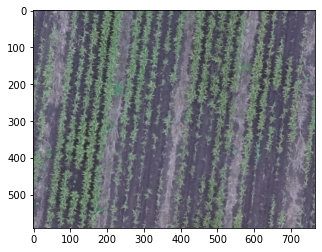

In [116]:
plt.imshow(img)

In [117]:
g_2 = np.array(img[:,:,1], dtype = np.int32) *2
ExG = g_2 - np.array(img[:,:,0], dtype = np.int32) - np.array(img[:,:,2], dtype = np.int32)

In [118]:
ExG[ExG < 0] = 0

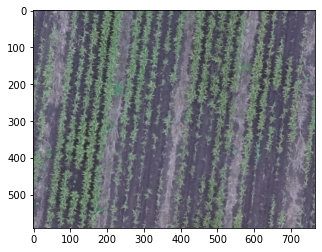

In [119]:
plt.imshow(img)

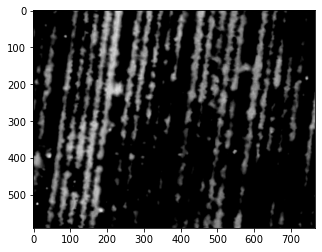

In [120]:
plt.imshow(ExG, cmap = "gray")

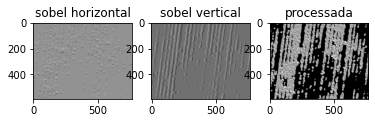

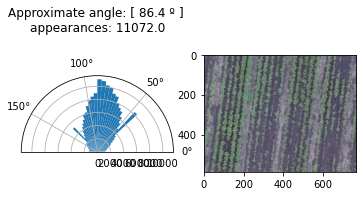

In [121]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

#img = cv2.imread("mosaico_02_02.png") #load image
#gray = rgb2gray(img_result)
#filtros sobel

gray = ExG/255
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


In [146]:

otsu_threshold, image_result = cv2.threshold( np.array(ExG, dtype = np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Obtained threshold: ", otsu_threshold)


Obtained threshold:  18.0


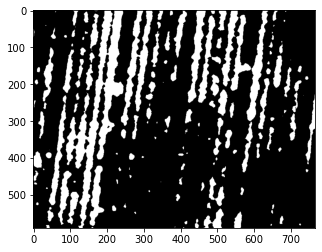

In [147]:
plt.imshow(image_result, cmap = 'gray')

In [140]:
image_result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [192]:
from skimage.util import invert
from skimage.transform import hough_line

from skimage.transform import hough_line_peaks

In [142]:
from skimage.morphology import skeletonize

In [143]:
inv_image_result = invert(image_result)

In [144]:
inv_image_result[inv_image_result==255] = 1

In [145]:
inv_image_result

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [148]:
image_result[image_result==255] = 1

In [176]:
skeleton = skeletonize(image_result, method = 'zhang')

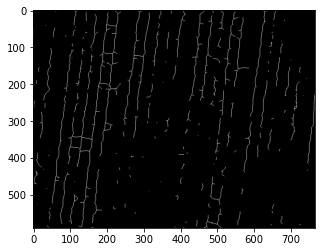

In [178]:
plt.imshow(skeleton, cmap=plt.cm.gray)

In [153]:
skeleton = np.array(skeleton, dtype = np.uint8)
skeleton[skeleton == 1] = 255

In [171]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)


In [179]:
hough, angles, dist = hough_line(skeleton)

In [182]:
ones = np.ones_like(skeleton)

In [183]:
hough_one, angles_one, dist_one = hough_line(ones)

In [186]:
hough_one[hough_one == 0] = 1

In [189]:
hough_norm = np.divide(hough,hough_one)

In [194]:
hough_final, angles_final, dist_final = hough_line_peaks(hough_norm, angles, dist)

In [198]:
angles_final[2]

0.11408018015828847

In [199]:
img = cv2.imread("Tmpisque_06_06.png") #load image

for i in range(0, len(angles_final)):
    a = np.cos(angles_final[i])
    b = np.sin(angles_final[i])
    x0 = a*dist_final[i]
    y0 = b*dist_final[i]
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines1.jpg',img)

True

In [157]:
img = cv2.imread("Tmpisque_06_06.png") #load image
lines = cv2.HoughLines(skeleton,1,np.pi/180 * 0.1,50, min_theta = ((np.pi * (86.4+5)/180) - np.pi/2)*-1, max_theta =  ((np.pi * (86.4-5)/180) - np.pi/2) * -1)
for rho,theta in lines.squeeze():
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines1.jpg',img)

True

In [158]:
lines

array([[[ 2.03000000e+02,  1.25663698e-01]],

       [[ 2.02000000e+02,  1.22173041e-01]],

       [[ 2.01000000e+02,  1.20427713e-01]],

       [[ 2.04000000e+02,  1.27409026e-01]],

       [[ 1.16000000e+02,  1.22173041e-01]],

       [[ 2.31000000e+02,  1.23918369e-01]],

       [[ 1.15000000e+02,  1.20427713e-01]],

       [[ 1.17000000e+02,  1.25663698e-01]],

       [[ 1.75000000e+02,  1.27409026e-01]],

       [[ 1.73000000e+02,  1.22173041e-01]],

       [[ 2.30000000e+02,  1.18682384e-01]],

       [[ 1.74000000e+02,  1.23918369e-01]],

       [[ 6.24000000e+02,  1.22173041e-01]],

       [[ 2.05000000e+02,  1.32645026e-01]],

       [[ 1.76000000e+02,  1.30899698e-01]],

       [[ 2.00000000e+02,  1.15191728e-01]],

       [[ 2.32000000e+02,  1.29154369e-01]],

       [[ 5.42000000e+02,  1.25663698e-01]],

       [[ 1.72000000e+02,  1.18682384e-01]],

       [[ 1.14000000e+02,  1.18682384e-01]],

       [[ 1.14000000e+02,  1.15191728e-01]],

       [[ 1.77000000e+02,  1.34390

In [298]:
 ((np.pi * (86.4-5)/180) - np.pi/2) * -1

0.1500983156715121

In [294]:
lines[0][0][1]

0.1256637

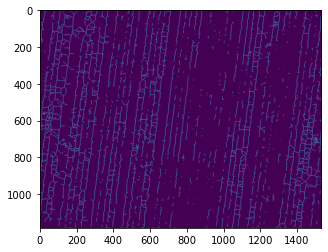

In [261]:
plt.imshow(skeleton)

In [204]:
lines.squeeze()

array([[ 7.3200000e+02,  1.2391838e-01],
       [ 7.3300000e+02,  1.2566370e-01],
       [ 7.7400000e+02,  1.2566370e-01],
       ...,
       [-1.5070000e+03,  3.1241393e+00],
       [-9.0000000e+02,  3.1276300e+00],
       [-1.0640000e+03,  3.1381021e+00]], dtype=float32)

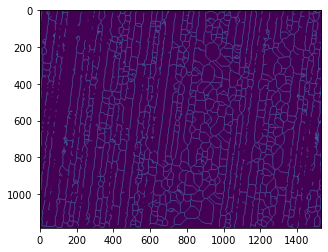

In [181]:
plt.imshow(skeleton)

In [183]:
minLineLength = 50
maxLineGap = 5
lines = cv2.HoughLinesP(skeleton,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

cv2.imwrite('houghlines5.jpg',img)

True